# Lab work #1
# Lypnytska Inna
# CS32


# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Завантаження датасету
df = pd.read_csv("Arrest_Data_from_2020_to_Present.csv")
print("Завантажено дані. Кількість рядків і стовпців:", df.shape)

# 2. Попередній аналіз
print("\n Інформація про датасет")
print(df.info())
print("\n Пропущені значення")
print(df.isnull().sum())

# 3. Очищення даних
df = df.drop_duplicates()
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
df.fillna(0, inplace=True)

# 4. Кодування категоріальних змінних
cat_columns = df.select_dtypes(include='object').columns.tolist()
print("\n Категоріальні колонки")
print(cat_columns)

if 'Charge Description' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['Charge Description'], drop_first=True)
else:
    df_encoded = df.copy()

# 5. Нормалізація числових ознак
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# 6. Збереження очищеного датасету
df_encoded.to_csv("cleaned_arrest_data.csv", index=False)
print("\n Очищений датасет збережено як cleaned_arrest_data.csv")


Завантажено дані. Кількість рядків і стовпців: (334577, 25)

 Інформація про датасет
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334577 entries, 0 to 334576
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Report ID                 334577 non-null  int64  
 1   Report Type               334577 non-null  object 
 2   Arrest Date               334577 non-null  object 
 3   Time                      334556 non-null  float64
 4   Area ID                   334577 non-null  int64  
 5   Area Name                 334577 non-null  object 
 6   Reporting District        334577 non-null  int64  
 7   Age                       334577 non-null  int64  
 8   Sex Code                  334577 non-null  object 
 9   Descent Code              334577 non-null  object 
 10  Charge Group Code         302453 non-null  float64
 11  Charge Group Description  302402 non-null  object 
 12  Arrest Type Cod

## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

Базові статистики
Середнє:
 Report ID               -9.514197e-18
Time                     1.664984e-16
Area ID                 -1.012582e-16
Reporting District      -9.463228e-17
Age                      2.622351e-16
Charge Group Code       -5.173345e-17
LAT                      1.763185e-15
LON                     -1.055396e-15
Booking Time            -4.757098e-18
Booking Location Code    7.747275e-17
dtype: float64

Медіана:
 Report ID               -0.535881
Time                     0.118706
Area ID                  0.083501
Reporting District       0.087672
Age                     -0.180113
Charge Group Code       -0.007188
LAT                      0.113497
LON                     -0.115458
Booking Time            -0.021717
Booking Location Code    0.518592
dtype: float64

Стандартне відхилення:
 Report ID                1.000001
Time                     1.000001
Area ID                  1.000001
Reporting District       1.000001
Age                      1.000001
Charge Group Cod

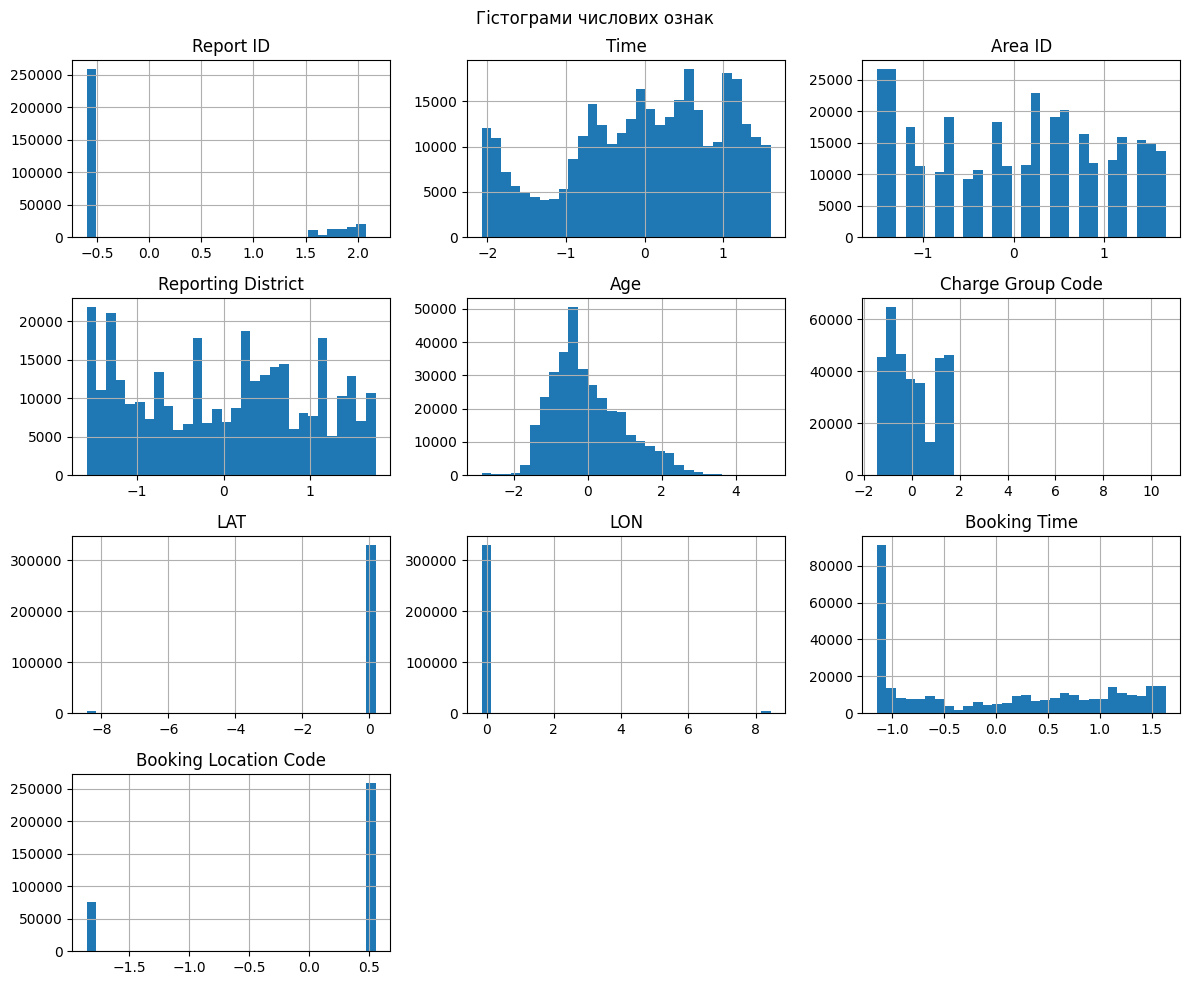

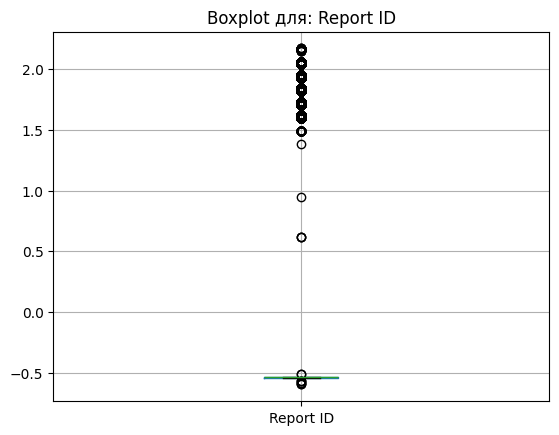

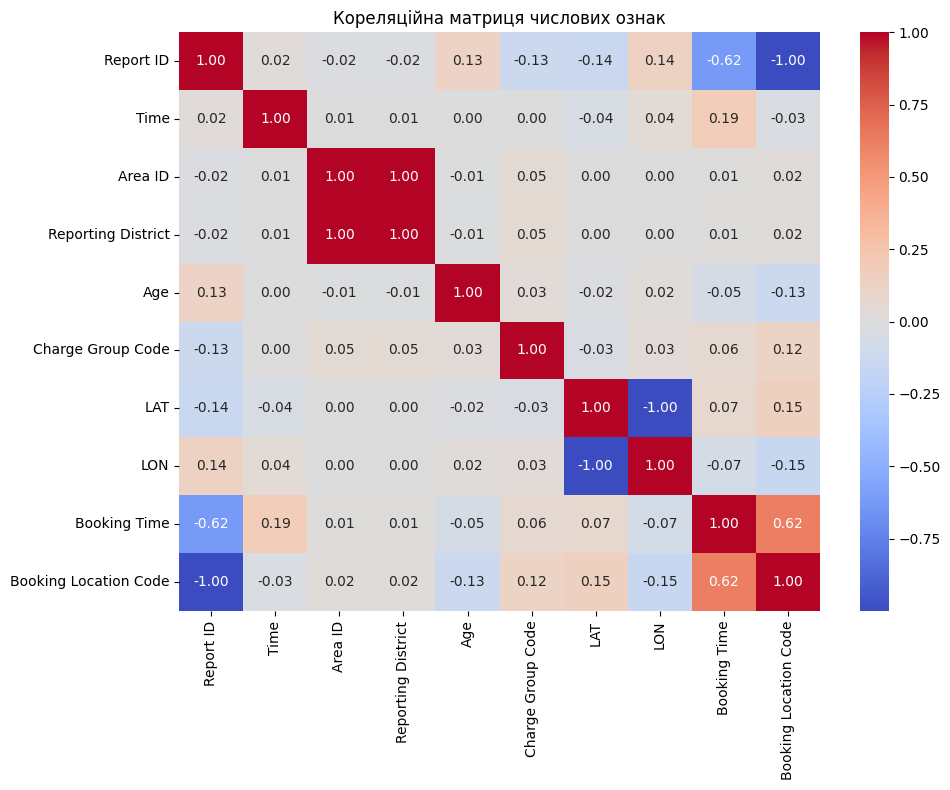

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df_encoded
except NameError:
    df_encoded = pd.read_csv("cleaned_arrest_data.csv")

numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# 1. Статистики
print("Базові статистики")
print("Середнє:\n", df_encoded[numeric_cols].mean())
print("\nМедіана:\n", df_encoded[numeric_cols].median())
print("\nСтандартне відхилення:\n", df_encoded[numeric_cols].std())

# 2. Гістограми
df_encoded[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Гістограми числових ознак")
plt.tight_layout()
plt.show()

# 3. Boxplot
df_encoded.boxplot(column=[numeric_cols[0]])
plt.title(f"Boxplot для: {numeric_cols[0]}")
plt.show()

# 4. Heatmap кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця числових ознак")
plt.tight_layout()
plt.show()


## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

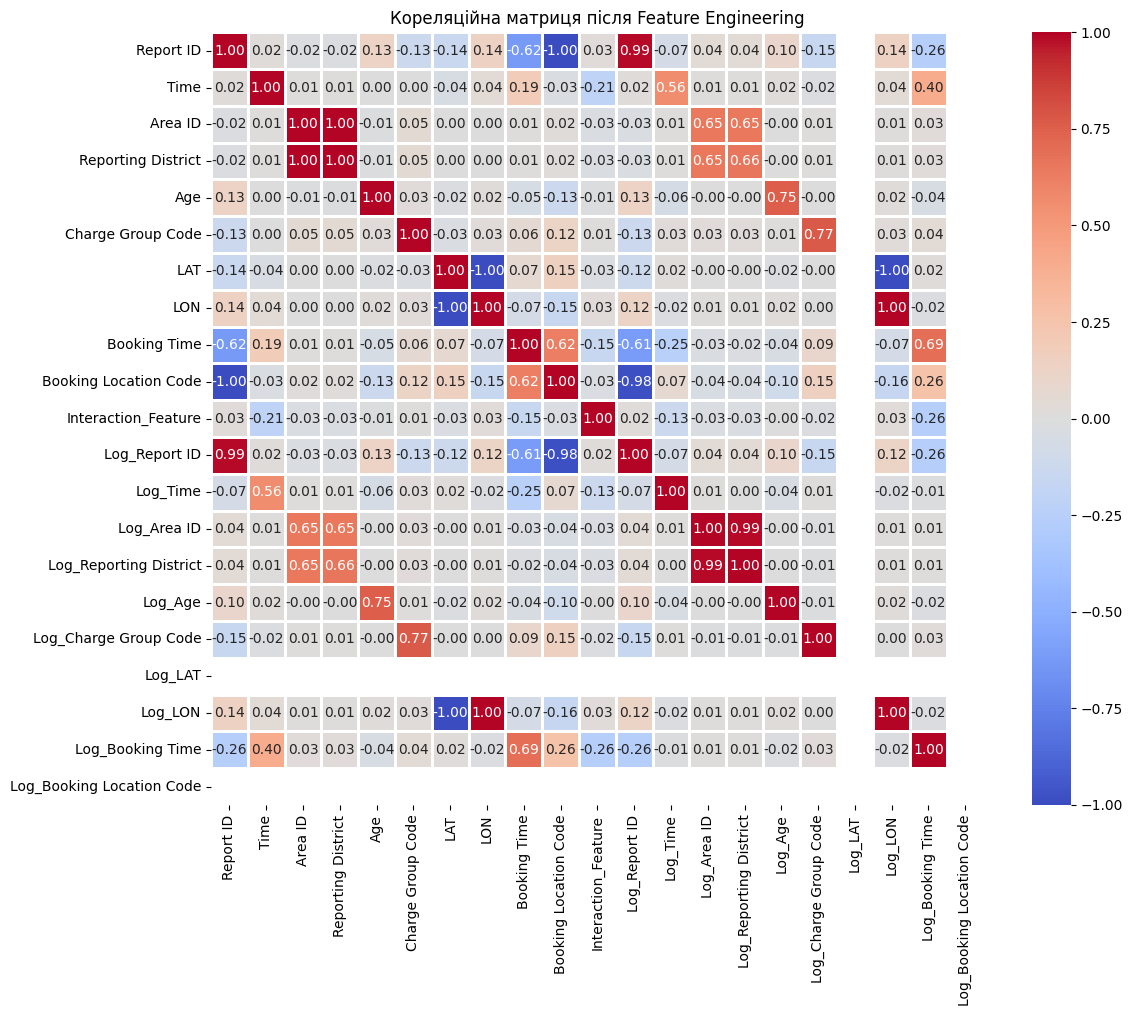

<ipython-input-11-e38f9fa41879>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df_encoded, palette='Set1')


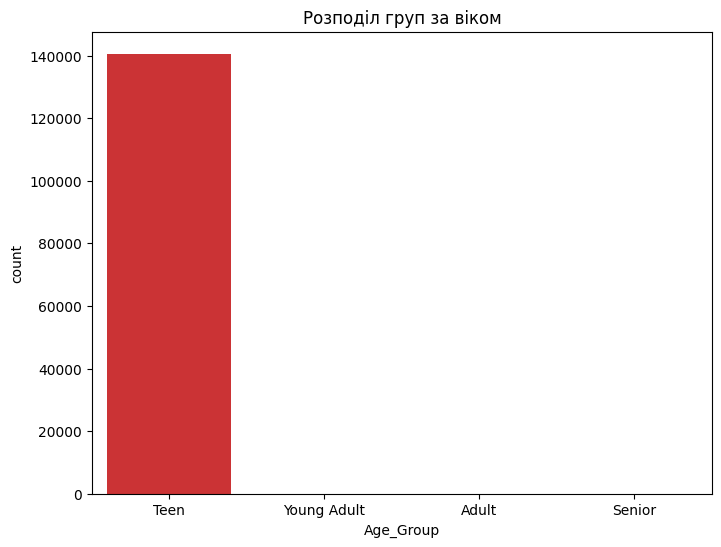

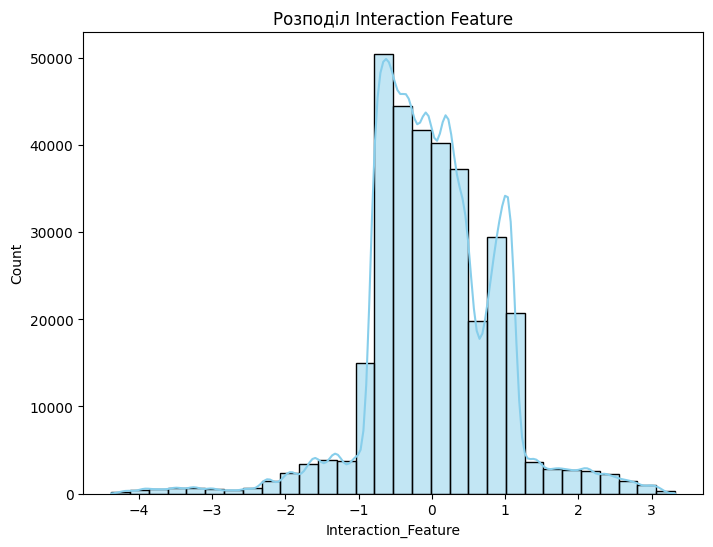


 Оновлений датасет збережено як enhanced_arrest_data.csv


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Завантаження даних
try:
    df_encoded
except NameError:
    df_encoded = pd.read_csv("cleaned_arrest_data.csv")

# 2. Визначення числових та категоріальних ознак
numeric_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# 3. Створення нових ознак
## Групування віку
if 'Age' in df_encoded.columns:
    df_encoded['Age_Group'] = pd.cut(df_encoded['Age'], bins=[0, 18, 30, 50, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

## Взаємодія числових ознак (множення перших двох числових колонок)
if len(numeric_cols) > 1:
    df_encoded['Interaction_Feature'] = df_encoded[numeric_cols[0]] * df_encoded[numeric_cols[1]]

## Логарифмічне перетворення (уникнення NaN)
if numeric_cols:
    for col in numeric_cols:
        df_encoded[f'Log_{col}'] = np.log1p(df_encoded[col].clip(lower=1))  # `lower=1` запобігає log(0) та NaN

# 4. Кореляційна матриця
df_corr = df_encoded.select_dtypes(include=['number'])  # Виключаємо категоріальні змінні
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr().round(2), annot=True, fmt=".2f", cmap="coolwarm", linewidths=1, square=True, mask=df_corr.corr().isnull())
plt.title("Кореляційна матриця після Feature Engineering")
plt.tight_layout()
plt.show()

# 5. Візуалізація створених ознак
## Розподіл груп за віком
if 'Age_Group' in df_encoded.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Age_Group', data=df_encoded, palette='Set1')
    plt.title("Розподіл груп за віком")
    plt.show()

## Візуалізація Interaction Feature
if 'Interaction_Feature' in df_encoded.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_encoded['Interaction_Feature'], bins=30, kde=True, color='skyblue')
    plt.title("Розподіл Interaction Feature")
    plt.show()

# 6. Збереження оновленого датасету
df_encoded.to_csv("enhanced_arrest_data.csv", index=False)
print("\n Оновлений датасет збережено як enhanced_arrest_data.csv")


## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

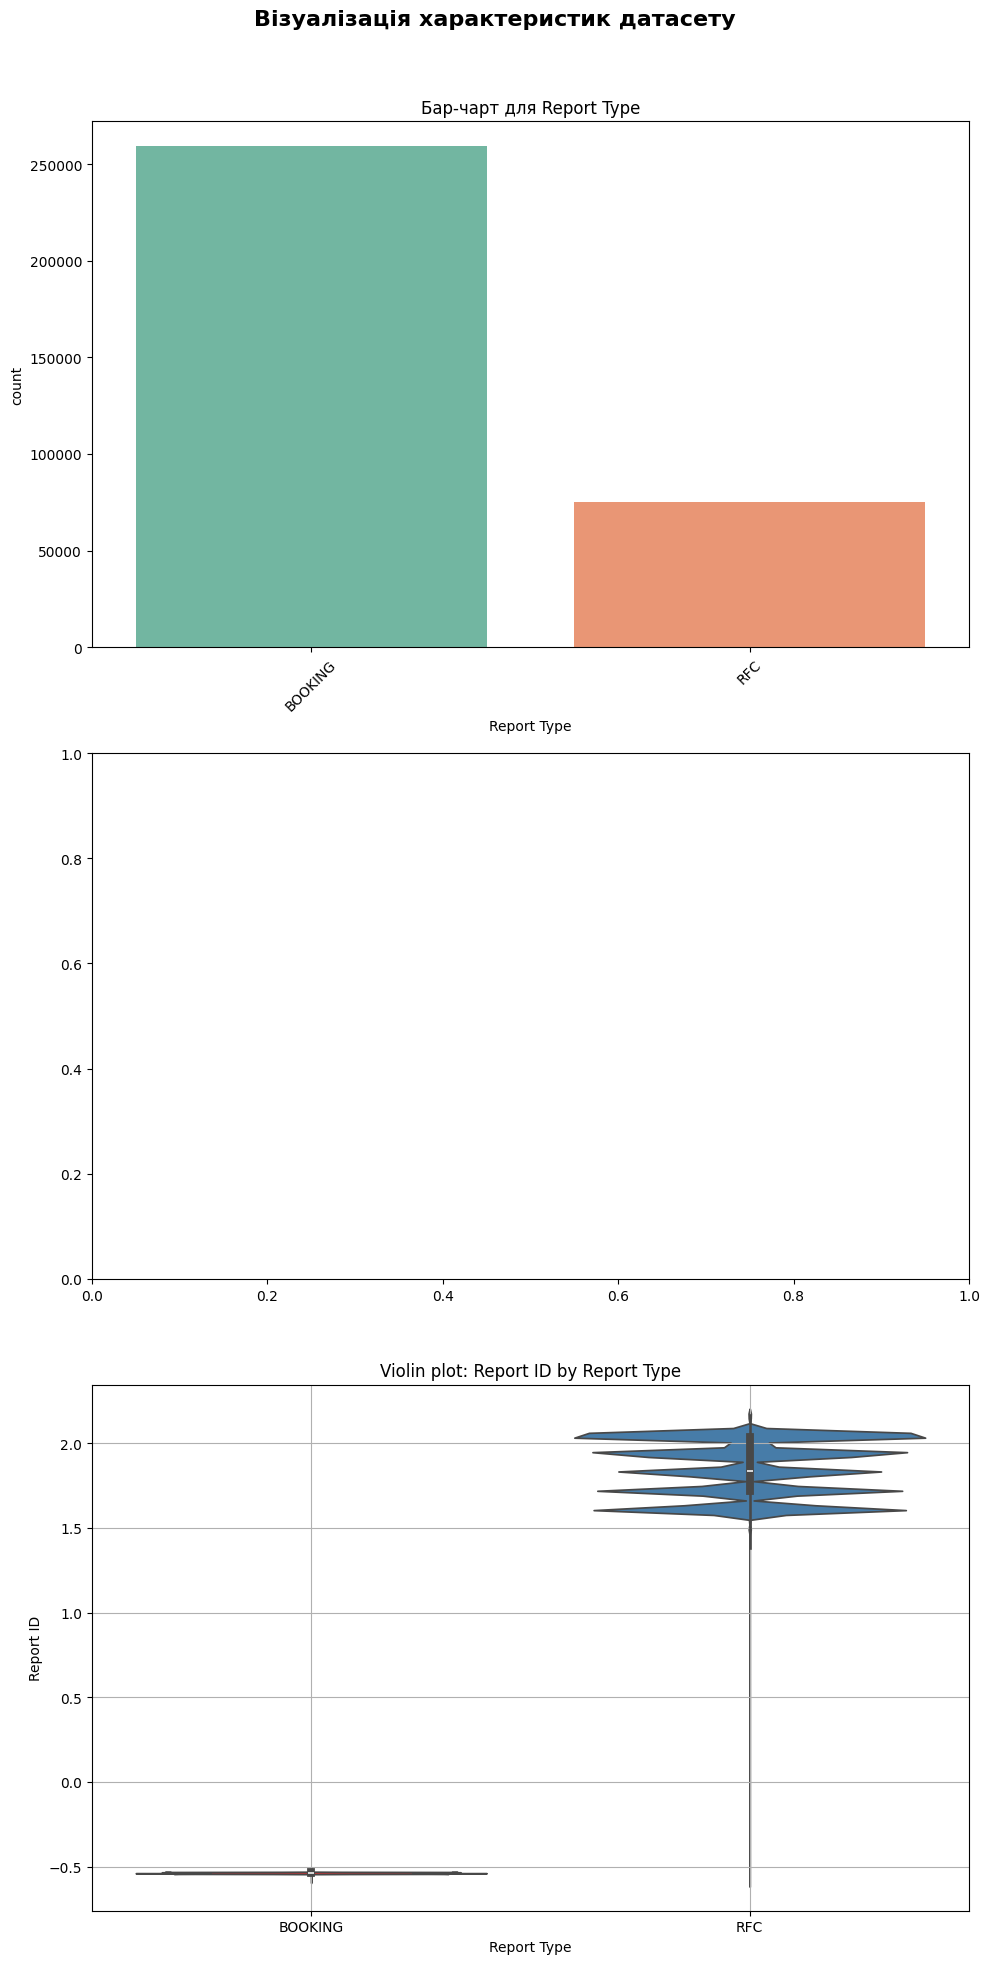

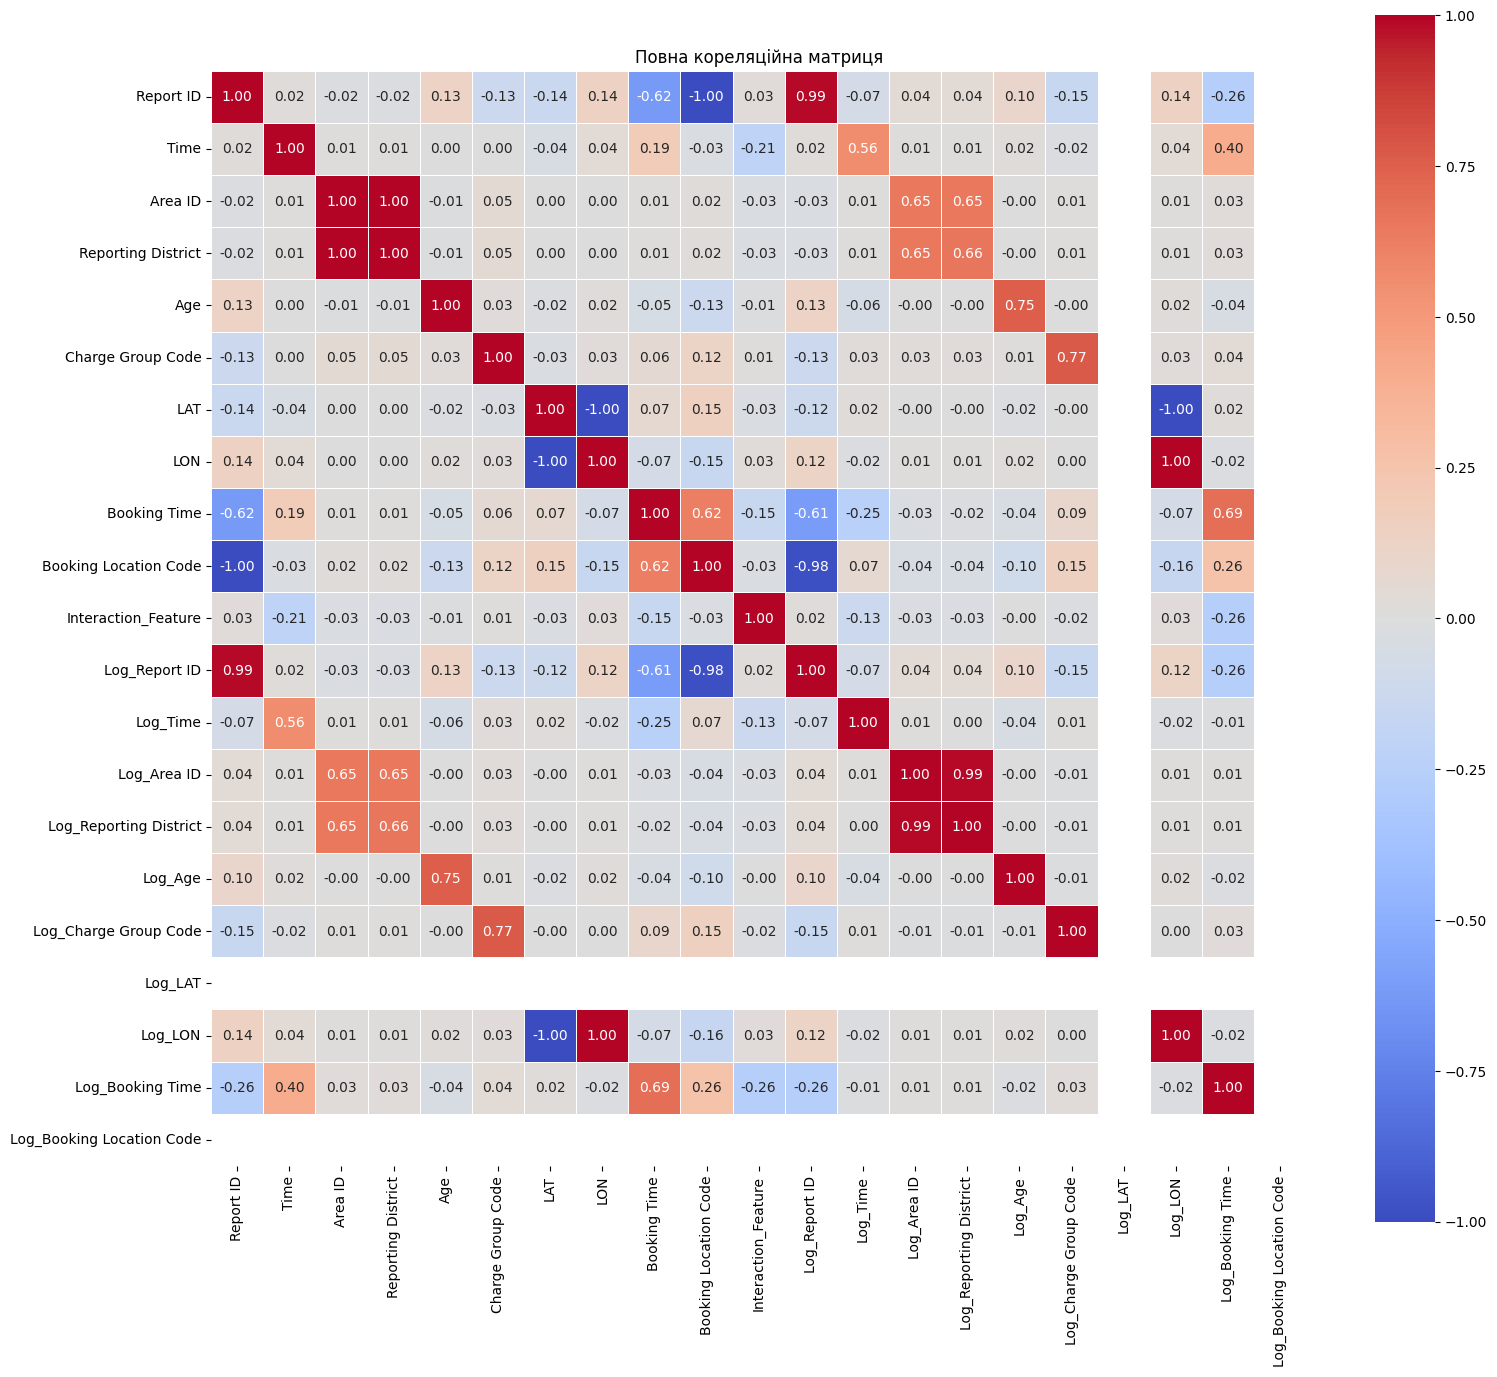

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
try:
    df_encoded
except NameError:
    df_encoded = pd.read_csv("enhanced_arrest_data.csv")

# Визначення типів змінних
numeric_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Створення фігури для subplot
fig, axes = plt.subplots(3, 1, figsize=(10, 20))  # Робимо три графіки тут
fig.suptitle("Візуалізація характеристик датасету", fontsize=16, fontweight="bold")

# Бар-чарт для категоріальних ознак
if categorical_cols:
    sns.countplot(x=categorical_cols[0], hue=categorical_cols[0], data=df_encoded, palette="Set2", legend=False, ax=axes[0])
    axes[0].set_title(f"Бар-чарт для {categorical_cols[0]}")
    axes[0].tick_params(axis='x', rotation=45)

# Лінійний графік (якщо є колонка з датою)
if "Date" in df_encoded.columns:
    df_encoded['Date'] = pd.to_datetime(df_encoded['Date'])
    time_trend = df_encoded.groupby(df_encoded['Date'].dt.month).size()
    axes[1].plot(time_trend.index, time_trend.values, marker="o", color="darkblue")
    axes[1].set_title("Тренди арештів по місяцях")
    axes[1].set_xlabel("Місяць")
    axes[1].set_ylabel("Кількість випадків")

# Violin plot для порівняння розподілу
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    sns.violinplot(x=categorical_cols[0], y=numeric_cols[0], data=df_encoded, palette="Set1", hue=categorical_cols[0], legend=False, ax=axes[2])
    axes[2].set_title(f"Violin plot: {numeric_cols[0]} by {categorical_cols[0]}")
    axes[2].grid(True)

# Оптимізація розташування
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Окремий великий графік для кореляційної матриці
plt.figure(figsize=(16, 14))  # Збільшуємо розмір
sns.heatmap(
    df_encoded[numeric_cols].corr().round(2),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Повна кореляційна матриця")
plt.tight_layout()
plt.show()
